## Sales Analysis

Analyzing past sales data can help us to predict future sales and trends, and ensure sales goals are met.

It can help identify issues and opportunities in sales operations, such as sales pipeline health, customer retention, and win/loss rates.

Sales analysis can help improve product decisions by identifying trends and patterns in sales data.

Analysing the data provides insights into product demand trends, seasonality.

By leveraging this data, we can optimise inventory levels, reduce carrying costs, minimise the risk of overstocking or understocking, and improve cash flow. 

In [21]:
#importing python libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [35]:
#Reading file
df=pd.read_csv('Diwali Sales Data.csv',encoding='unicode_escape')

In [36]:
df.shape

(11251, 14)

In [37]:
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,Unnamed
0,1002903,Sanskriti,P00125942,F,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN


In [38]:
df.tail()

,User_ID,Cust_name,Product_ID,Gender,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,Unnamed
11246,1000695,Manning,P00296942,M,19,1,Maharashtra,Western,Chemical,Office,4,370.0,NaN,NaN
11247,1004089,Reichenbach,P00171342,M,33,0,Haryana,Northern,Healthcare,Veterinary,3,367.0,NaN,NaN
11248,1001209,Oshin,P00201342,F,40,0,Madhya Pradesh,Central,Textile,Office,4,213.0,NaN,NaN
11249,1004023,Noonan,P00059442,M,37,0,Karnataka,Southern,Agriculture,Office,3,206.0,NaN,NaN
11250,1002744,Brumley,P00281742,F,19,0,Maharashtra,Western,Healthcare,Office,3,188.0,NaN,NaN


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age               11251 non-null  int64  
 5   Marital_Status    11251 non-null  int64  
 6   State             11251 non-null  object 
 7   Zone              11251 non-null  object 
 8   Occupation        11251 non-null  object 
 9   Product_Category  11251 non-null  object 
 10  Orders            11251 non-null  int64  
 11  Amount            11239 non-null  float64
 12  Status            0 non-null      float64
 13  Unnamed           0 non-null      float64
dtypes: float64(3), int64(4), object(7)
memory usage: 1.2+ MB


In [40]:
df.drop(['Status','Unnamed'],axis=1,inplace=True)

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age               11251 non-null  int64  
 5   Marital_Status    11251 non-null  int64  
 6   State             11251 non-null  object 
 7   Zone              11251 non-null  object 
 8   Occupation        11251 non-null  object 
 9   Product_Category  11251 non-null  object 
 10  Orders            11251 non-null  int64  
 11  Amount            11239 non-null  float64
dtypes: float64(1), int64(4), object(7)
memory usage: 1.0+ MB


In [45]:
#checkiing for null value in the dataset
pd.isnull(df)

,User_ID,Cust_name,Product_ID,Gender,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
11246,False,False,False,False,False,False,False,False,False,False,False,False
11247,False,False,False,False,False,False,False,False,False,False,False,False
11248,False,False,False,False,False,False,False,False,False,False,False,False
11249,False,False,False,False,False,False,False,False,False,False,False,False


In [46]:
pd.isnull(df).sum()

User_ID              0
Cust_name            0
Product_ID           0
Gender               0
Age                  0
Marital_Status       0
State                0
Zone                 0
Occupation           0
Product_Category     0
Orders               0
Amount              12
dtype: int64

In [47]:
rows_with_null_values=df[df.isnull().any(axis=1)]

In [48]:
print(rows_with_null_values)

     User_ID Cust_name Product_ID Gender  Age  Marital_Status           State  \
7    1002092  Shivangi  P00273442      F   61               0     Maharashtra   
14   1003858      Cano  P00293742      M   46               1  Madhya Pradesh   
16   1005447       Amy  P00275642      F   48               1  Andhra Pradesh   
109  1005265    Sakshi  P00296242      F   48               1           Delhi   
111  1005261   Apoorva  P00057942      F   41               1           Delhi   
184  1005538    Kartik  P00269542      F   49               1       Karnataka   
293  1000326  Jonathan  P00120542      M   53               0         Gujarat   
344  1002507   Lakshmi  P00045842      F   35               1         Gujarat   
345  1004498   Srishti  P00030842      F   55               0           Delhi   
452  1004601    Gaurav  P00014442      F   40               1  Madhya Pradesh   
464  1004528    Anurag  P00338442      F   33               1   Uttar Pradesh   
493  1002994    Hemant   P00

In [49]:
#filling the null values with mean after grouping
df['Amount']= df.groupby('Product_Category')['Amount'].transform(lambda x:x.fillna(x.mean()))

In [57]:
#checking if the null values are replaced
selected_rows=df[(df['User_ID']==1004498) & (df['Product_ID']=='P00030842')]
print(selected_rows)

     User_ID Cust_name Product_ID Gender  Age  Marital_Status  State     Zone  \
345  1004498   Srishti  P00030842      F   55               0  Delhi  Central   

    Occupation  Product_Category  Orders        Amount  
345    Textile  Footwear & Shoes       1  14707.468791  


In [59]:
#checking if the null values are replaced
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age               11251 non-null  int64  
 5   Marital_Status    11251 non-null  int64  
 6   State             11251 non-null  object 
 7   Zone              11251 non-null  object 
 8   Occupation        11251 non-null  object 
 9   Product_Category  11251 non-null  object 
 10  Orders            11251 non-null  int64  
 11  Amount            11251 non-null  float64
dtypes: float64(1), int64(4), object(7)
memory usage: 1.0+ MB


In [63]:
#converting the Amount column values to int to make it easier for analysis
df['Amount']=df['Amount'].astype('int')
df['Amount'].dtypes

dtype('int64')

In [65]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age', 'Marital_Status',
       'State', 'Zone', 'Occupation', 'Product_Category', 'Orders', 'Amount'],
      dtype='object')

In [67]:
#renaming the column
df.rename(columns= {'Marital_Status':'Married'})

,User_ID,Cust_name,Product_ID,Gender,Age,Married,State,Zone,Occupation,Product_Category,Orders,Amount
0,1002903,Sanskriti,P00125942,F,28,0,Maharashtra,Western,Healthcare,Auto,1,23952
1,1000732,Kartik,P00110942,F,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934
2,1001990,Bindu,P00118542,F,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924
3,1001425,Sudevi,P00237842,M,16,0,Karnataka,Southern,Construction,Auto,2,23912
4,1000588,Joni,P00057942,M,28,1,Gujarat,Western,Food Processing,Auto,2,23877
...,...,...,...,...,...,...,...,...,...,...,...,...
11246,1000695,Manning,P00296942,M,19,1,Maharashtra,Western,Chemical,Office,4,370
11247,1004089,Reichenbach,P00171342,M,33,0,Haryana,Northern,Healthcare,Veterinary,3,367
11248,1001209,Oshin,P00201342,F,40,0,Madhya Pradesh,Central,Textile,Office,4,213
11249,1004023,Noonan,P00059442,M,37,0,Karnataka,Southern,Agriculture,Office,3,206


In [72]:
#FCategorizing the age into groups

def categorize_age(age):
    if age <=17:
        return '0-17'
    elif age <=25:
        return '18-25'
    elif age <=35:
        return '26-35'
    elif age <=45:
        return '36-45'
    elif age <=50:
        return '46-50'
    elif age <=55:
        return '51-55'
    else:
        return '55+'

In [70]:
df['Age_group']=df['Age'].apply(categorize_age)

In [71]:
df

,User_ID,Cust_name,Product_ID,Gender,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Age_group
0,1002903,Sanskriti,P00125942,F,28,0,Maharashtra,Western,Healthcare,Auto,1,23952,26-35
1,1000732,Kartik,P00110942,F,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934,26-35
2,1001990,Bindu,P00118542,F,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924,26-35
3,1001425,Sudevi,P00237842,M,16,0,Karnataka,Southern,Construction,Auto,2,23912,0-17
4,1000588,Joni,P00057942,M,28,1,Gujarat,Western,Food Processing,Auto,2,23877,26-35
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11246,1000695,Manning,P00296942,M,19,1,Maharashtra,Western,Chemical,Office,4,370,18-25
11247,1004089,Reichenbach,P00171342,M,33,0,Haryana,Northern,Healthcare,Veterinary,3,367,26-35
11248,1001209,Oshin,P00201342,F,40,0,Madhya Pradesh,Central,Textile,Office,4,213,36-45
11249,1004023,Noonan,P00059442,M,37,0,Karnataka,Southern,Agriculture,Office,3,206,36-45


In [73]:
df[['Age','Orders','Amount']].describe()

,Age,Orders,Amount
count,11251.000000,11251.000000,11251.000000
mean,35.421207,2.489290,9460.454626
std,12.754122,1.115047,5224.434220
min,12.000000,1.000000,188.000000
25%,27.000000,1.500000,5443.500000
50%,33.000000,2.000000,8110.000000
75%,43.000000,3.000000,12691.500000
max,92.000000,4.000000,23952.000000


EDA-Exploratory Data Analysis

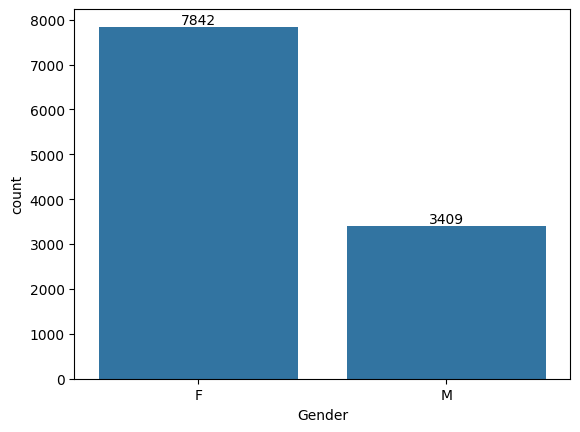

In [75]:
ax=sns.countplot(x='Gender',data=df)

for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='Gender', ylabel='Amount'>

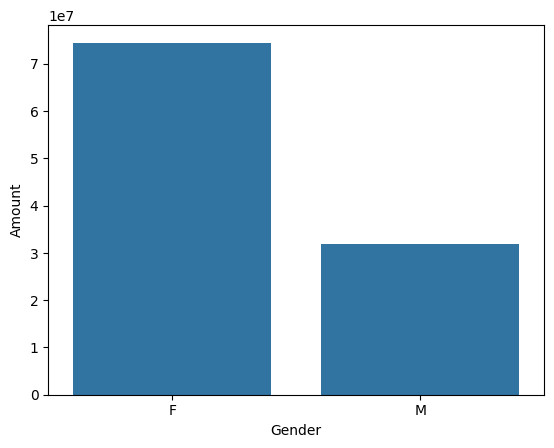

In [81]:
sales_gen=df.groupby(['Gender'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False)

sns.barplot(x='Gender',y='Amount',data=sales_gen)

The above analysis concludes that most of the buyers are females.

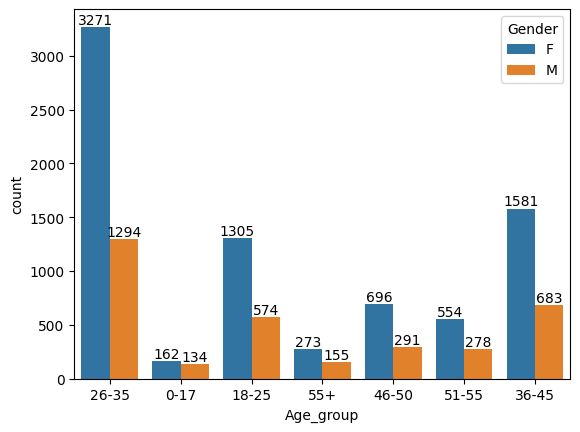

In [84]:
ax=sns.countplot(x='Age_group',data=df,hue='Gender')

for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='Age_group', ylabel='Amount'>

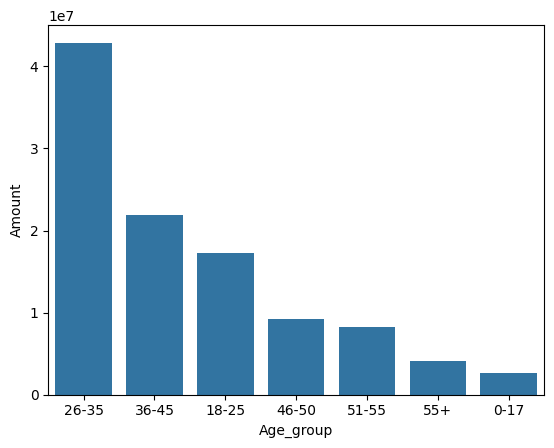

In [85]:
sales_age=df.groupby(['Age_group'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False)

sns.barplot(x='Age_group',y='Amount',data=sales_age)

The above analysis shows which age group and which gender generates the most business for the Company.

<Axes: xlabel='State', ylabel='Orders'>

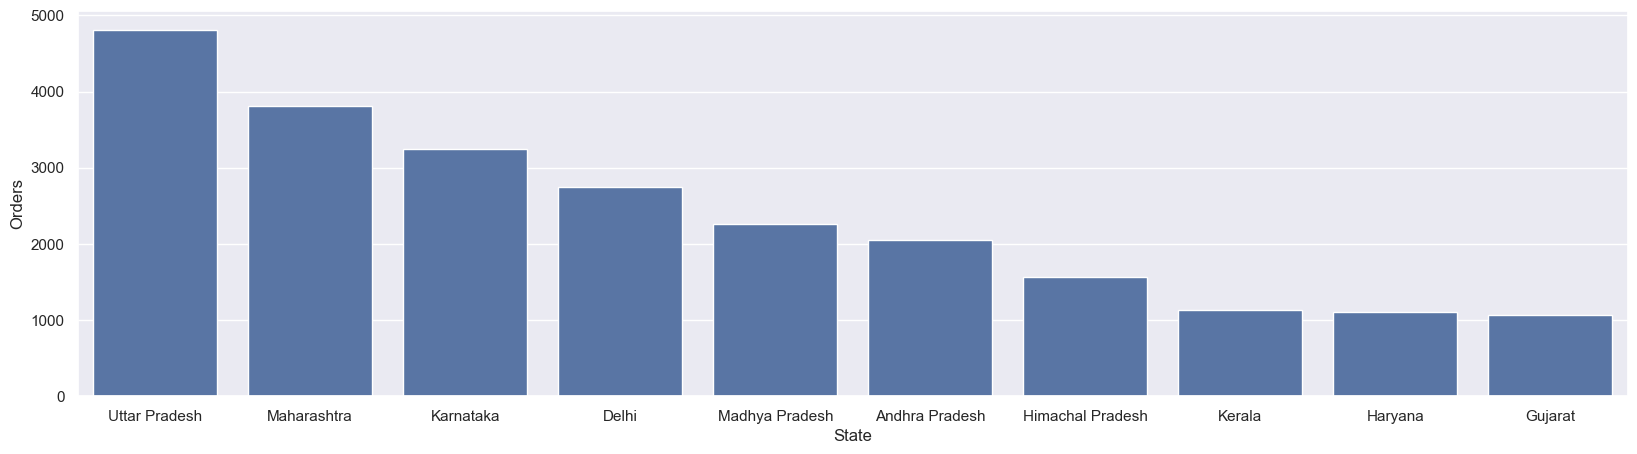

In [99]:
State_sales=df.groupby(['State'],as_index=False)['Orders'].sum().sort_values(by='Orders',ascending=False).head(10)

sns.set(rc={'figure.figsize':(20,5)})
sns.barplot(x='State',y='Orders',data=State_sales)

<Axes: xlabel='State', ylabel='Amount'>

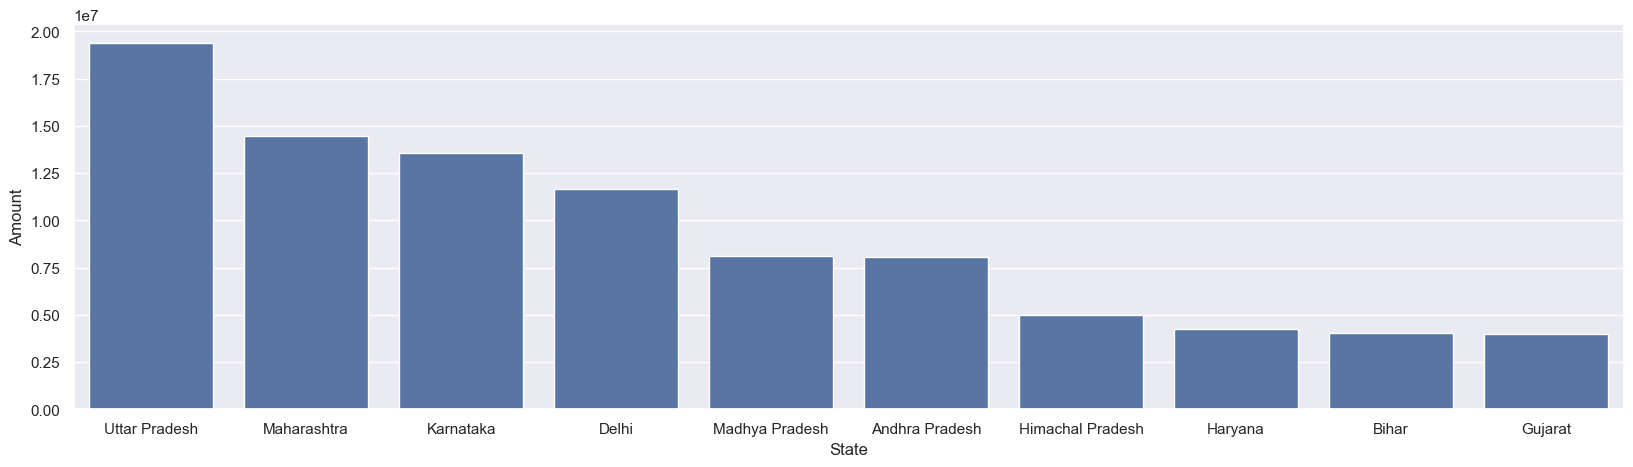

In [101]:
State_sales=df.groupby(['State'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False).head(10)

sns.set(rc={'figure.figsize':(20,5)})
sns.barplot(x='State',y='Amount',data=State_sales)

The above analysis shows us the top 10 States which bring in maximum orders

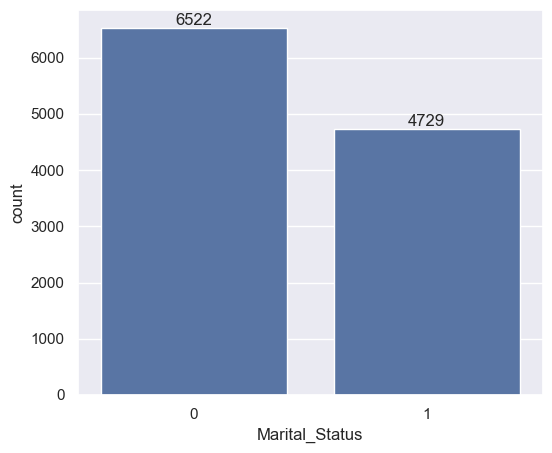

In [107]:
ax=sns.countplot(data=df,x='Marital_Status')

sns.set(rc={'figure.figsize':(8,5)})
for bars in ax.containers:
    ax.bar_label(bars)

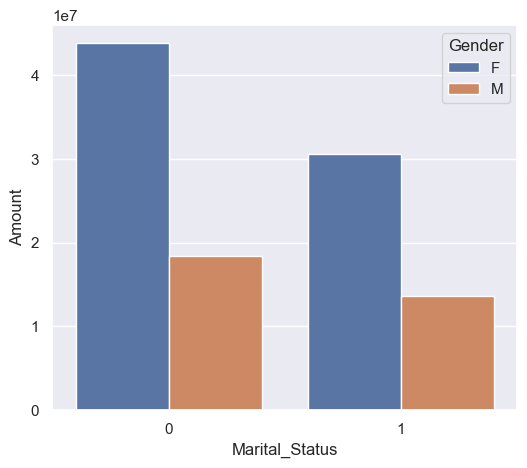

In [119]:
sales=df.groupby(['Marital_Status','Gender'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False)

sns.set(rc={'figure.figsize':(6,5)})
ax=sns.barplot(x='Marital_Status',y='Amount',data=sales,hue='Gender')

The above analysis shows us how Marital status and Gender affects the purchasing. (0-Married)  and (1-Unmarried)

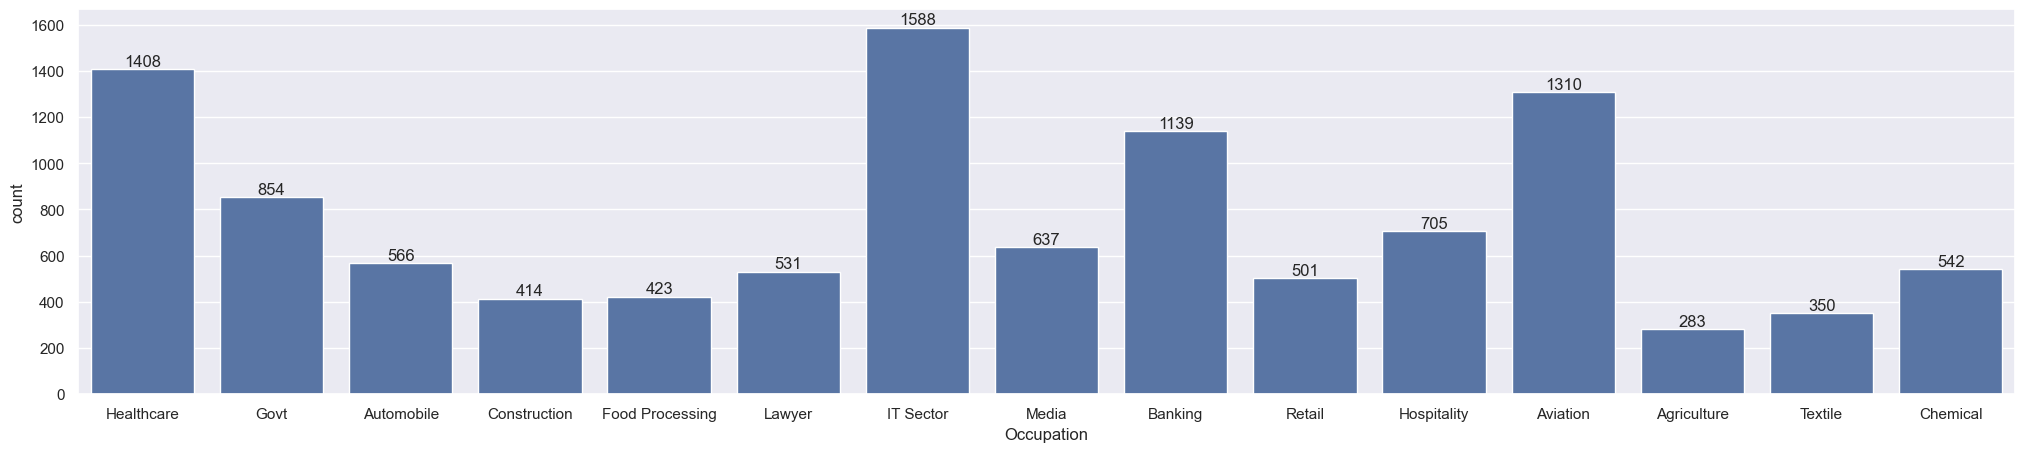

In [121]:
ax=sns.countplot(data=df,x='Occupation')

sns.set(rc={'figure.figsize':(20,5)})
for bars in ax.containers:
    ax.bar_label(bars)

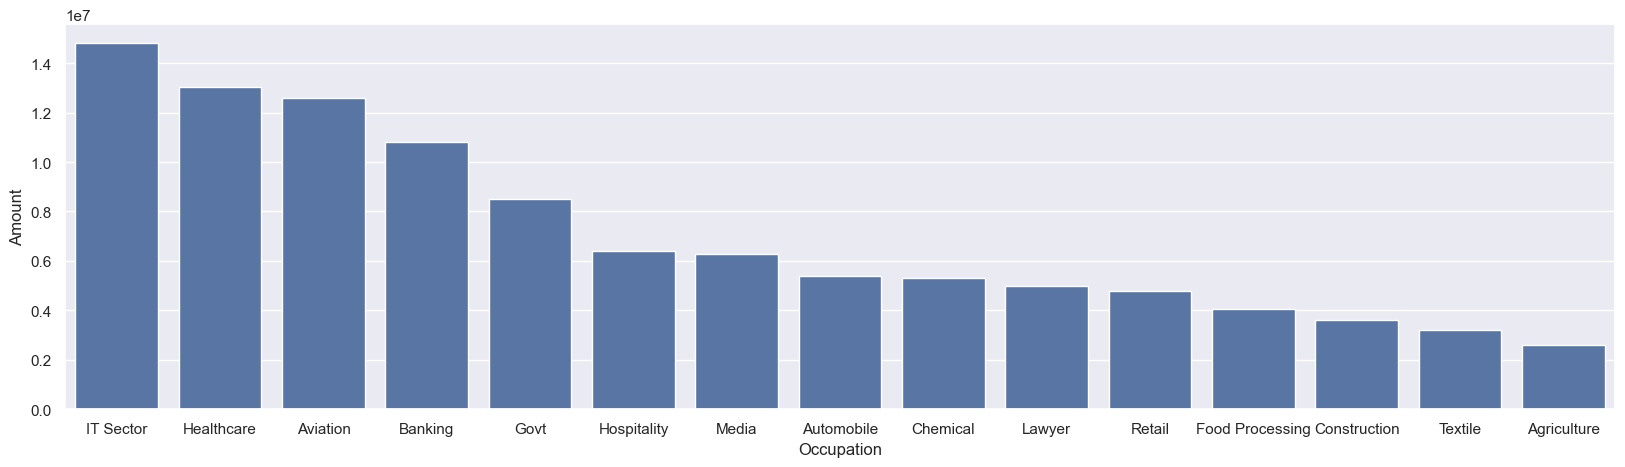

In [123]:
sales=df.groupby(['Occupation'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False)

sns.set(rc={'figure.figsize':(20,5)})
ax=sns.barplot(x='Occupation',y='Amount',data=sales)

The above analysis shows us which occuption group has high contribution to the sales.

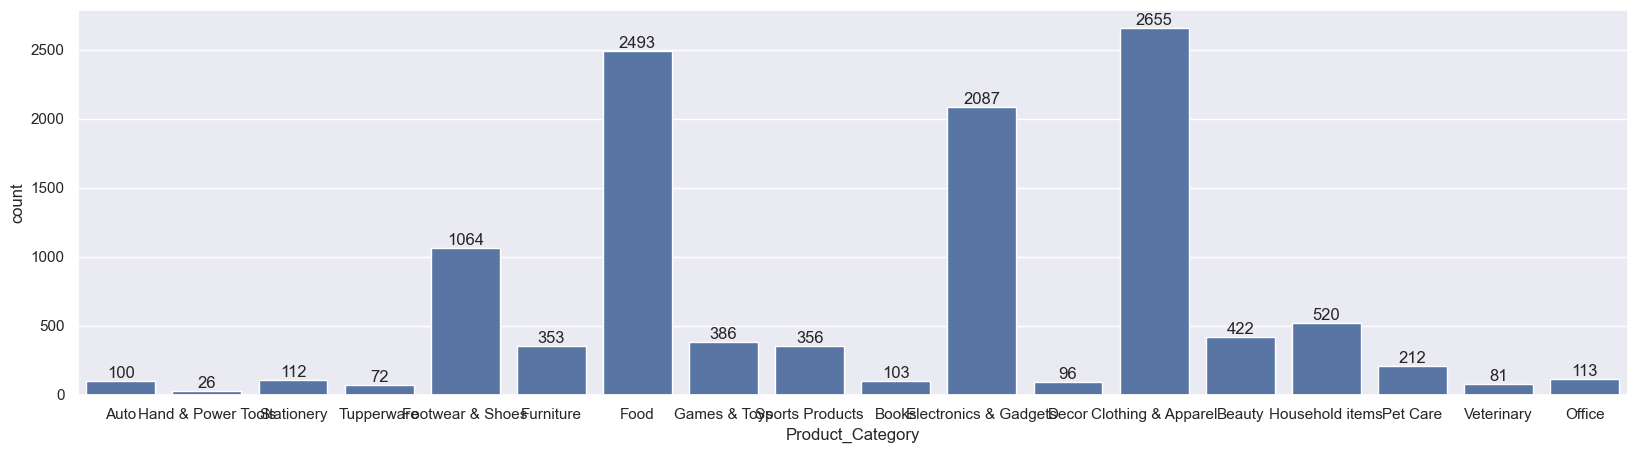

In [127]:
ax=sns.countplot(data=df,x='Product_Category')

sns.set(rc={'figure.figsize':(30,5)})
for bars in ax.containers:
    ax.bar_label(bars)

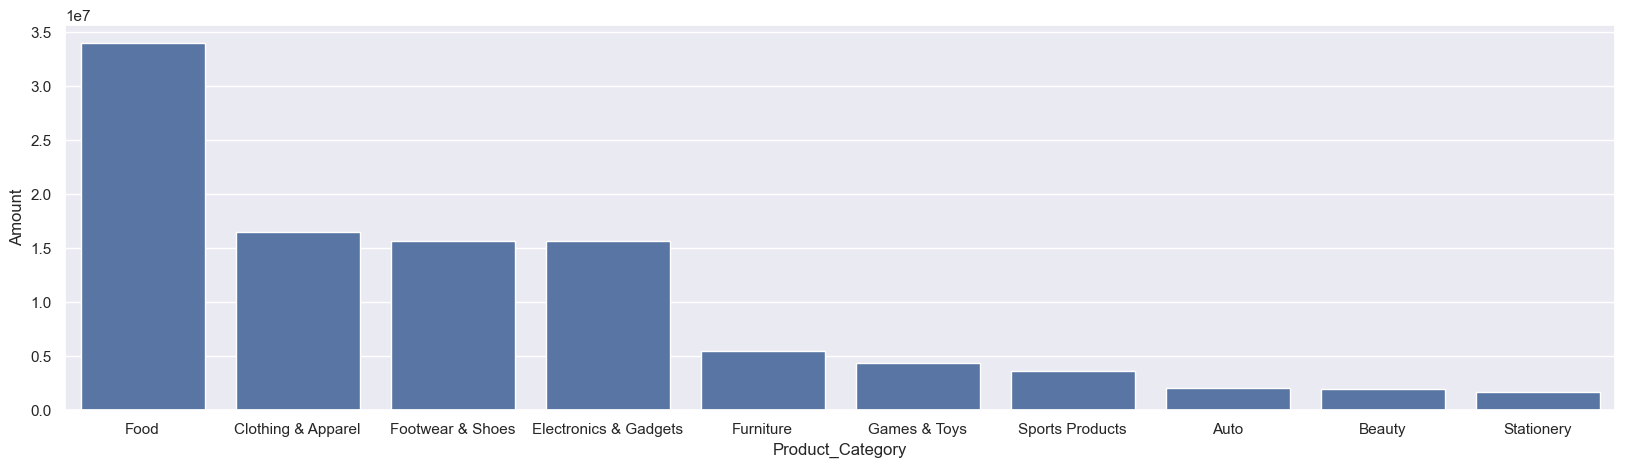

In [130]:
sales_pc=df.groupby(['Product_Category'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False).head(10)

sns.set(rc={'figure.figsize':(20,5)})
ax=sns.barplot(x='Product_Category',y='Amount',data=sales_pc)

The above analysis shows us which Product groups have high contribution to the sales.

In [131]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age', 'Marital_Status',
       'State', 'Zone', 'Occupation', 'Product_Category', 'Orders', 'Amount',
       'Age_group'],
      dtype='object')

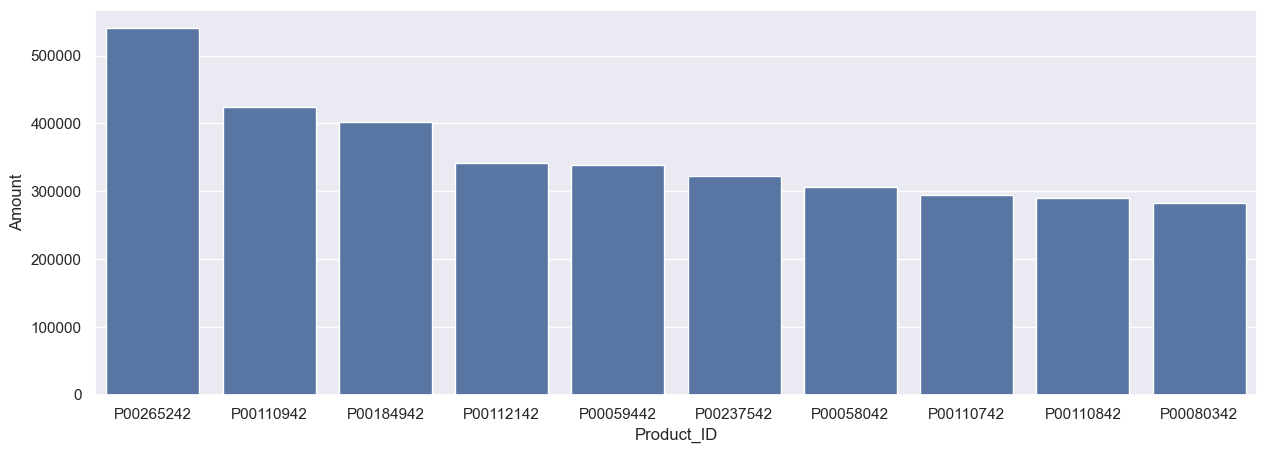

In [135]:
sales_pid=df.groupby(['Product_ID'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False).head(10)

sns.set(rc={'figure.figsize':(15,5)})
ax=sns.barplot(x='Product_ID',y='Amount',data=sales_pid)

The above analysis shows the top 10 most sold products.

## Conclusion

Married women in the age group of 26-35 years from UP,Maharastra and Karnataka working in IT,Healthcare and Aviation are more likely to buy products from Food,Clothing,Footwear and Electronics category.